In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('penguins_size.csv')
df = df.dropna()
df['sex'].replace('.','FEMALE',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [5]:
X= pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [8]:
from sklearn.ensemble import RandomForestClassifier
#help(RandomForestClassifier)

In [10]:
rfc = RandomForestClassifier(n_estimators=10,random_state=101)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [11]:
y_pred = rfc.predict(X_test)

In [13]:
#Model Evaluation

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

confusion_matrix(y_test,y_pred)

array([[40,  1,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]])

In [14]:
rfc.feature_importances_

array([3.46584088e-01, 1.20150588e-01, 2.39262547e-01, 1.48533620e-01,
       1.39253740e-01, 2.10550136e-05, 6.19436222e-03])

In [15]:
pd.DataFrame(index=X.columns, data=rfc.feature_importances_,columns=['Feature Importances']).sort_values('Feature Importances')

,Feature Importances
island_Torgersen,0.000021
sex_MALE,0.006194
culmen_depth_mm,0.120151
island_Dream,0.139254
body_mass_g,0.148534
flipper_length_mm,0.239263
culmen_length_mm,0.346584


In [16]:
# Choosing correct number of trees

test_error = []

for t in range(1,40):
    mod = RandomForestClassifier(n_estimators=t)
    mod.fit(X_train,y_train)
    y_pred = mod.predict(X_test)
    test_error.append(1-accuracy_score(y_pred,y_test))

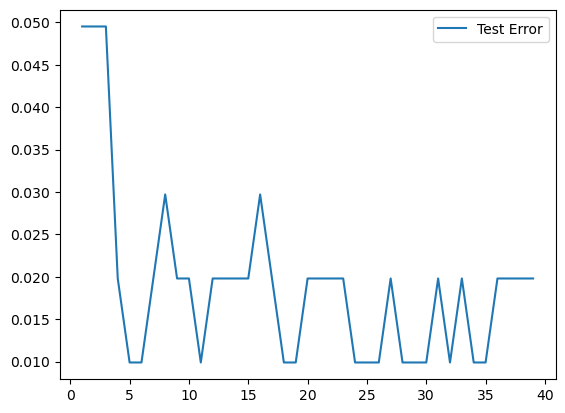

In [18]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()